# PRICING DINÁMICO DE HABITACIONES DE HOTEL

*Cristian Rubio Barato*

*Francisco Martínez Esteso*

*José Vicente García López*

*Víctor Ortega Gómez*


## ÍNDICE

1. [ANÁLISIS EXPLORATORIO DE DATOS](#1-análisis-exploratorio-de-datos)  
   1.1 [Análisis Variables Predictoras](#11-análisis-de-variables-predictoras)  
   1.2 [Análisis Variable Objetivo](#12-análisis-variable-objetivo)  
   1.3 [Correlación de Variables Continuas](#13-correlación-de-variables-continuas)  
   1.4 [Importancia de Variables Continuas](#14-importancia-de-variables-continuas)  

2. [PREPROCESAMIENTO](#2-preprocesamiento)  
   2.1 [Pipeline de Datos](#21-pipeline-de-datos)

## 1. ANÁLISIS EXPLORATORIO DE DATOS

In [47]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
df = pd.read_csv('hotel_booking.csv')

categorical_vars = df.select_dtypes(include=['object', 'category']).columns.tolist()
continuous_vars = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Variables Categóricas:", categorical_vars)
print("Variables Continuas:", continuous_vars)

Variables Categóricas: ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status', 'reservation_status_date', 'name', 'email', 'phone-number', 'credit_card']
Variables Continuas: ['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']


In [49]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [50]:
df.drop(columns = ["agent", "company", "arrival_date_week_number", "email", "phone-number", "credit_card", "name"], inplace = True)
df.dropna(inplace = True)

In [51]:
# Pasar "reservation_status_date" a datetime

df["reservation_status_date"] = pd.to_datetime(df["reservation_status_date"]).dt.date

df["reservation_status_year"] = pd.to_datetime(df["reservation_status_date"]).dt.year

df = df.drop(df[df["reservation_status_year"] == 2014].index)

In [52]:
# Pasar "arrival_date_month" y "children" a enteros

df["arrival_date_month"] = pd.to_datetime(df["arrival_date_month"], format = "%B").dt.month

df["children"] = df["children"].astype(int)

In [53]:
y = df['adr']
X = df.drop(columns=['adr'])

### 1.1 Análisis Variables Predictoras

In [54]:
X.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,reservation_status_year
count,118717.000000,118717.000000,118717.000000,118717.000000,118717.000000,118717.000000,118717.000000,118717.000000,118717.000000,118717.000000,118717.000000,118717.000000,118717.000000,118717.000000,118717.000000,118717.000000,118717.000000,118717.000000
mean,0.370393,104.029617,2016.159421,6.551345,15.800854,0.930305,2.502902,1.858175,0.104366,0.007960,0.030543,0.085582,0.131835,0.221518,2.334308,0.061979,0.572555,2016.097728
std,0.482912,106.737483,0.706551,3.089032,8.779217,0.996318,1.901514,0.578990,0.399456,0.097454,0.172077,0.843575,1.485794,0.653225,17.643652,0.244346,0.792967,0.711241
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000
25%,0.000000,18.000000,2016.000000,4.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016.000000
50%,0.000000,69.000000,2016.000000,7.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016.000000
75%,1.000000,160.000000,2017.000000,9.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2017.000000
max,1.000000,737.000000,2017.000000,12.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,8.000000,5.000000,2017.000000


In [55]:
df["is_canceled"].value_counts(normalize = True) * 100

0    62.960654
1    37.039346
Name: is_canceled, dtype: float64

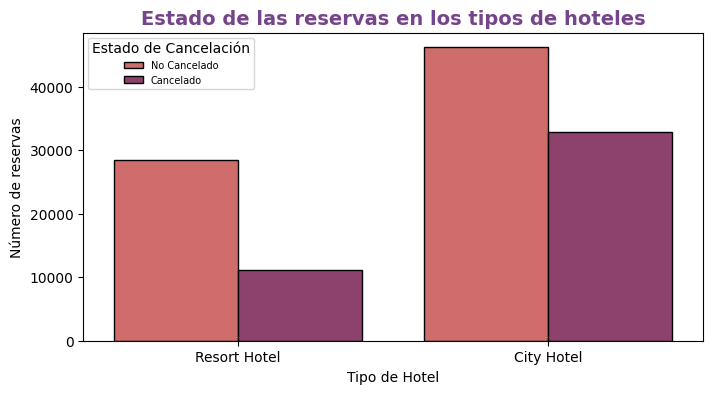

In [56]:
plt.figure(figsize=(8, 4))

sns.countplot(data=X, x="hotel", 
              hue=X["is_canceled"].map({0: "No Cancelado", 1: "Cancelado"}),  
              edgecolor="k", palette="flare")

plt.title("Estado de las reservas en los tipos de hoteles", size=14, weight="bold", color="#76448A")
plt.xlabel("Tipo de Hotel")
plt.ylabel("Número de reservas")
plt.legend(title="Estado de Cancelación", fontsize=7)

plt.show()


C:\Users\USUARIO\AppData\Local\Temp\ipykernel_25244\1934864472.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=X,
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_25244\1934864472.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([month_mapping[m] for m in sorted(X["arrival_date_month"].unique())])


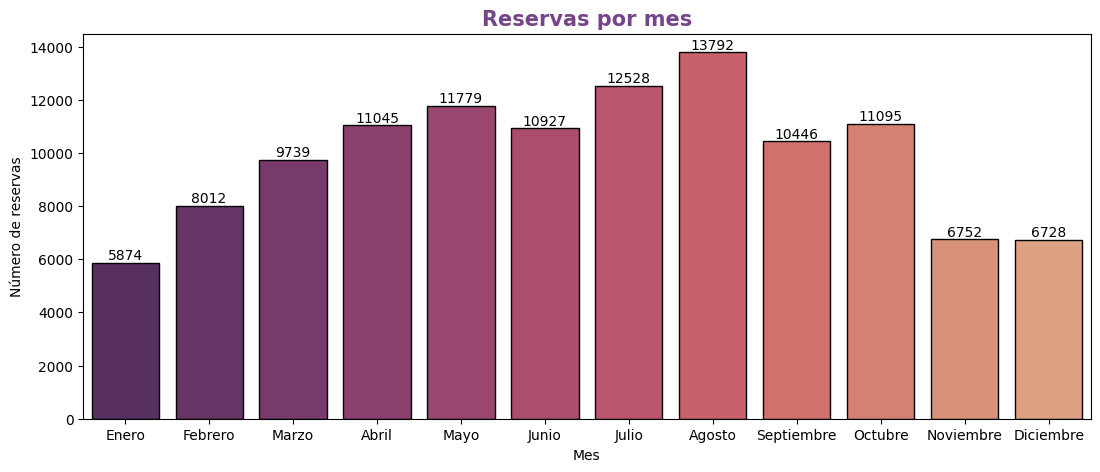

In [57]:
month_mapping = {
    1: "Enero", 2: "Febrero", 3: "Marzo", 4: "Abril", 5: "Mayo", 6: "Junio",
    7: "Julio", 8: "Agosto", 9: "Septiembre", 10: "Octubre", 11: "Noviembre", 12: "Diciembre"
}

plt.figure(figsize=(13, 5))

ax = sns.countplot(data=X, 
                   x=X["arrival_date_month"],  
                   edgecolor="k", palette="flare_r", 
                   order=sorted(X["arrival_date_month"].unique()))  

ax.set_xticklabels([month_mapping[m] for m in sorted(X["arrival_date_month"].unique())])

for index, value in enumerate(X["arrival_date_month"].value_counts().sort_index()):
    ax.text(index, value, str(int(value)), ha="center", va="bottom", fontsize=10)

plt.title("Reservas por mes", size=15, color="#76448A", weight="bold")
plt.xlabel("Mes")
plt.ylabel("Número de reservas")

plt.show()


C:\Users\USUARIO\AppData\Local\Temp\ipykernel_25244\3091935769.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([month_mapping[m] for m in sorted(X["arrival_date_month"].unique())])


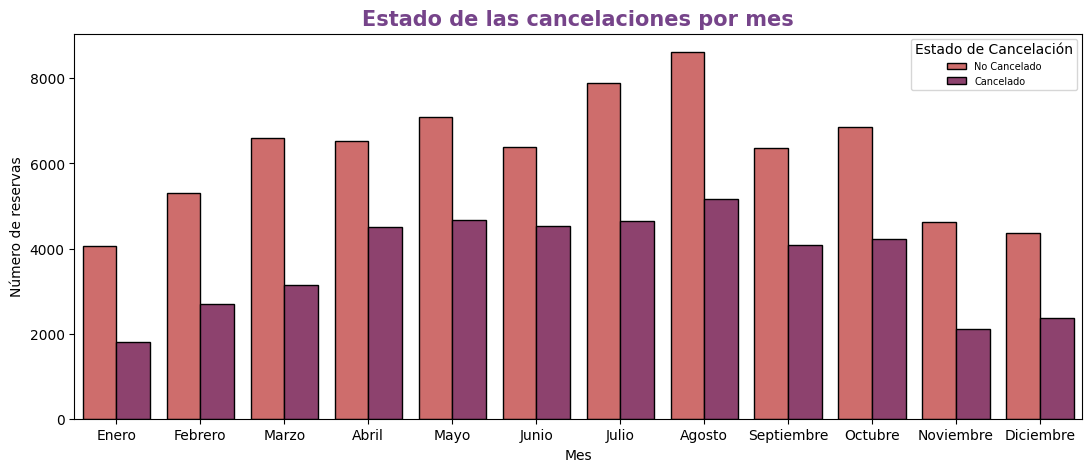

In [58]:

plt.figure(figsize=(13, 5))

ax = sns.countplot(data=X, x="arrival_date_month", hue=X["is_canceled"].map({0: "No Cancelado", 1: "Cancelado"}), 
                   edgecolor="k", palette="flare", order=sorted(X["arrival_date_month"].unique()))

ax.set_xticklabels([month_mapping[m] for m in sorted(X["arrival_date_month"].unique())])

ax.legend(title="Estado de Cancelación", fontsize=7)

plt.title("Estado de las cancelaciones por mes", size=15, color="#76448A", weight="bold")
plt.xlabel("Mes")
plt.ylabel("Número de reservas")

plt.show()


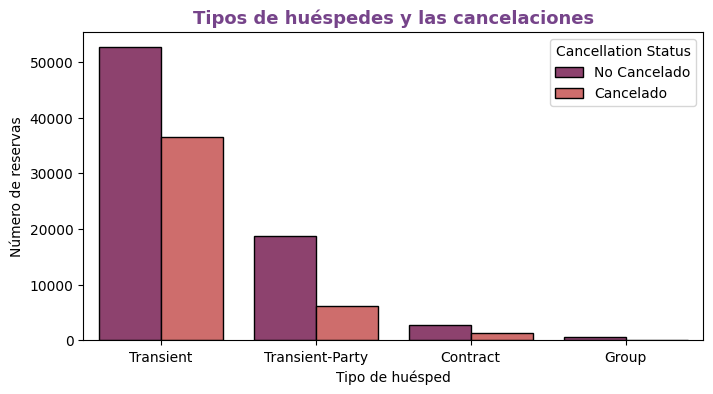

In [59]:
plt.figure(figsize=(8, 4))

ax = sns.countplot(data=X, 
                   x="customer_type", 
                   order=X["customer_type"].value_counts().index, 
                   hue=X["is_canceled"].map({0: "No Cancelado", 1: "Cancelado"}),  
                   edgecolor="k", palette="flare_r")

plt.title("Tipos de huéspedes y las cancelaciones", size=13, weight="bold", color="#76448A")
plt.xlabel("Tipo de huésped")
plt.ylabel("Número de reservas")

plt.legend(title="Cancellation Status", labels=["No Cancelado", "Cancelado"])

plt.show()

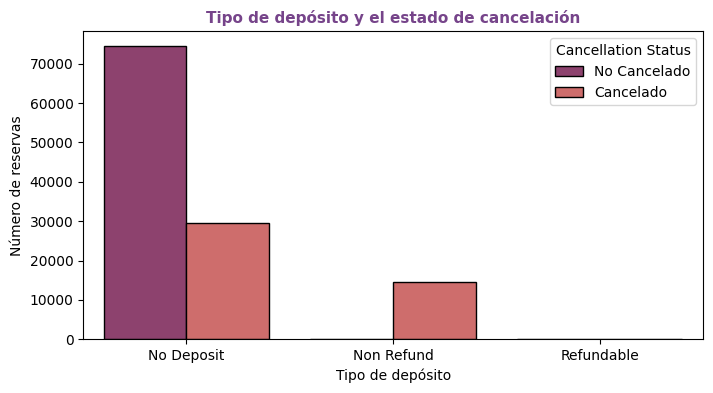

In [60]:
plt.figure(figsize=(8, 4))

ax = sns.countplot(data=X, 
                   x="deposit_type", 
                   order=X["deposit_type"].value_counts().index, 
                   hue=X["is_canceled"].map({0: "No Cancelado", 1: "Cancelado"}), 
                   edgecolor="k", palette="flare_r")

plt.title("Tipo de depósito y el estado de cancelación", size=11, weight="bold", color="#76448A")
plt.xlabel("Tipo de depósito")
plt.ylabel("Número de reservas")

plt.legend(title="Cancellation Status", labels=["No Cancelado", "Cancelado"])

plt.show()


### 1.2 Análisis Variable Objetivo

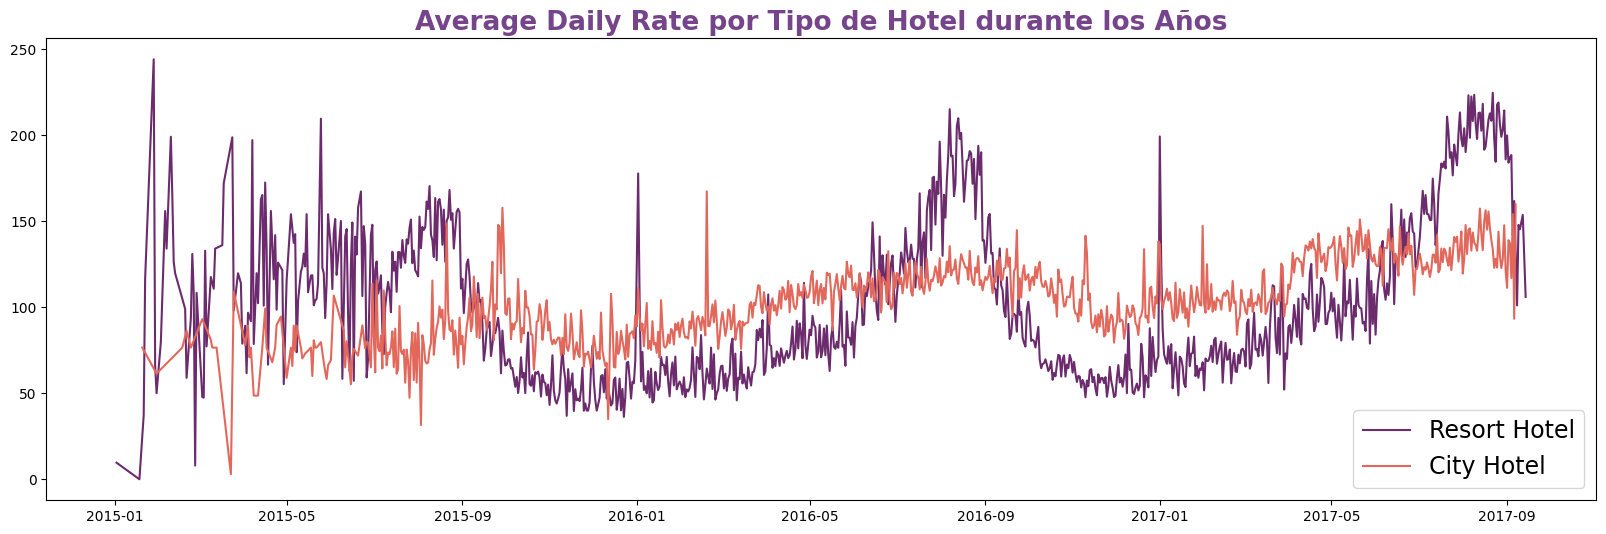

In [61]:
resort_hotel_adr = df[df["hotel"] == "Resort Hotel"].groupby("reservation_status_date")["adr"].mean().reset_index()
resort_hotel_adr.sort_values("reservation_status_date", inplace = True)

city_hotel_adr = df[df["hotel"] == "City Hotel"].groupby("reservation_status_date")["adr"].mean().reset_index()
city_hotel_adr.sort_values("reservation_status_date", inplace = True)
start_date = datetime.strptime("2015-01", "%Y-%m").date()
end_date = datetime.strptime("2017-10", "%Y-%m").date()

resort_hotel_adr = resort_hotel_adr[(resort_hotel_adr["reservation_status_date"] > start_date) &
                                    (resort_hotel_adr["reservation_status_date"] < end_date)]

city_hotel_adr = city_hotel_adr[(city_hotel_adr["reservation_status_date"] > start_date) &
                                (city_hotel_adr["reservation_status_date"] < end_date)]
plt.figure(figsize = (20, 6))

colors = sns.color_palette("flare_r")

plt.plot(resort_hotel_adr["reservation_status_date"], resort_hotel_adr["adr"], label = "Resort Hotel", color = colors[0])
plt.plot(city_hotel_adr["reservation_status_date"], city_hotel_adr["adr"], label = "City Hotel", color = colors[4])

plt.title("Average Daily Rate por Tipo de Hotel durante los Años", size = 19, weight = "bold", color = "#76448A")
plt.legend(fontsize = 17, loc = "lower right")

plt.show()

In [62]:
start_date = datetime.strptime("2015-07", "%Y-%m").date()

df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date']).dt.date  

df_filtered = df[df['reservation_status_date'] >= start_date]


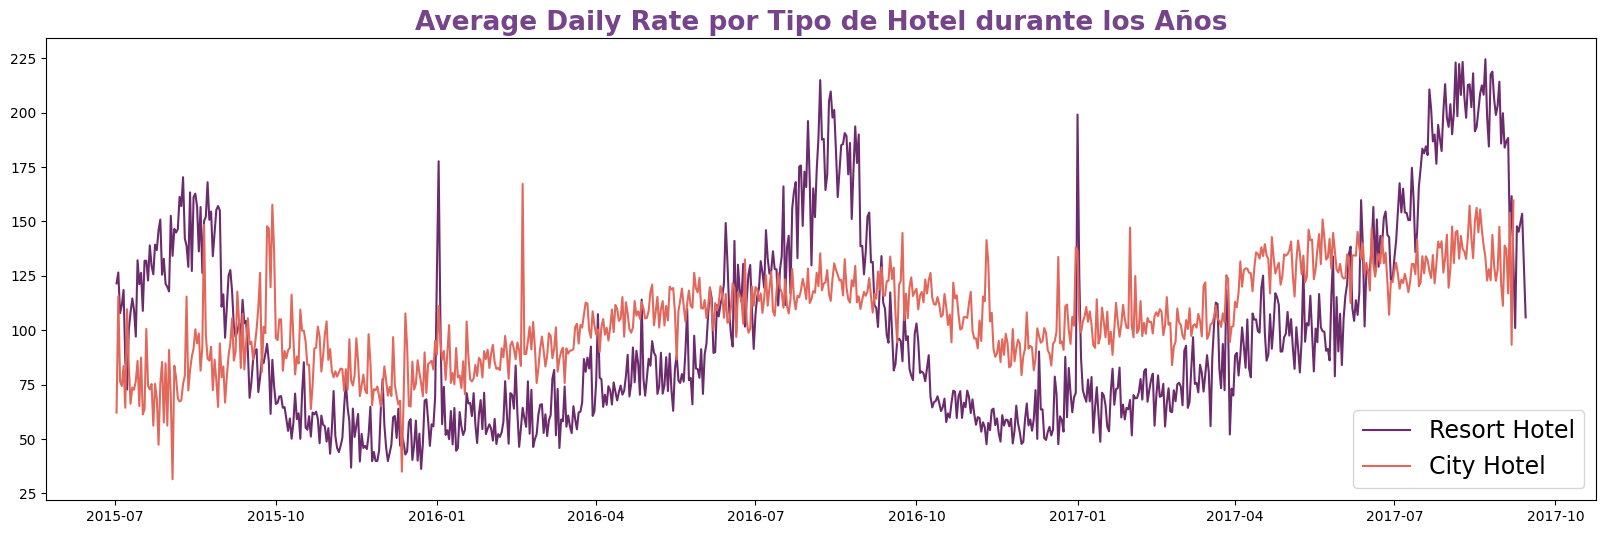

In [63]:
resort_hotel_adr = df[df["hotel"] == "Resort Hotel"].groupby("reservation_status_date")["adr"].mean().reset_index()
resort_hotel_adr.sort_values("reservation_status_date", inplace = True)

city_hotel_adr = df[df["hotel"] == "City Hotel"].groupby("reservation_status_date")["adr"].mean().reset_index()
city_hotel_adr.sort_values("reservation_status_date", inplace = True)
start_date = datetime.strptime("2015-07", "%Y-%m").date()
end_date = datetime.strptime("2017-10", "%Y-%m").date()

resort_hotel_adr = resort_hotel_adr[(resort_hotel_adr["reservation_status_date"] > start_date) &
                                    (resort_hotel_adr["reservation_status_date"] < end_date)]

city_hotel_adr = city_hotel_adr[(city_hotel_adr["reservation_status_date"] > start_date) &
                                (city_hotel_adr["reservation_status_date"] < end_date)]
plt.figure(figsize = (20, 6))

colors = sns.color_palette("flare_r")

plt.plot(resort_hotel_adr["reservation_status_date"], resort_hotel_adr["adr"], label = "Resort Hotel", color = colors[0])
plt.plot(city_hotel_adr["reservation_status_date"], city_hotel_adr["adr"], label = "City Hotel", color = colors[4])

plt.title("Average Daily Rate por Tipo de Hotel durante los Años", size = 19, weight = "bold", color = "#76448A")
plt.legend(fontsize = 17, loc = "lower right")

plt.show()

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_25244\305279848.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df, x="stays_in_weekend_nights", y="adr", edgecolor="k", palette="flare_r")


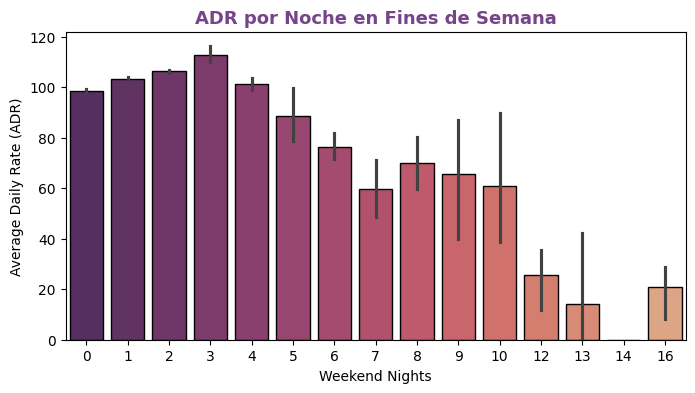

In [64]:
plt.figure(figsize=(8, 4))

ax = sns.barplot(data=df, x="stays_in_weekend_nights", y="adr", edgecolor="k", palette="flare_r")

plt.title("ADR por Noche en Fines de Semana", size=13, weight="bold", color="#76448A")
plt.xlabel("Weekend Nights")
plt.ylabel("Average Daily Rate (ADR)")

plt.show()


C:\Users\USUARIO\AppData\Local\Temp\ipykernel_25244\4279203026.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df.replace({"is_repeated_guest": {0: "No", 1: "Sí"}}),


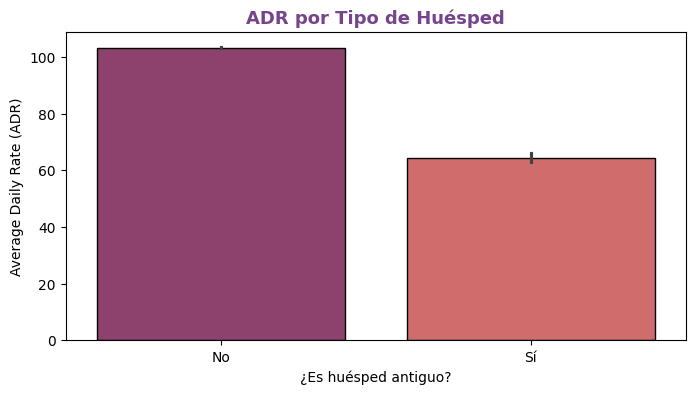

In [65]:
plt.figure(figsize=(8, 4))

ax = sns.barplot(data=df.replace({"is_repeated_guest": {0: "No", 1: "Sí"}}), 
                 x="is_repeated_guest", y="adr", edgecolor="k", palette="flare_r")

plt.title("ADR por Tipo de Huésped", size=13, weight="bold", color="#76448A")
plt.xlabel("¿Es huésped antiguo?")
plt.ylabel("Average Daily Rate (ADR)")

plt.show()


C:\Users\USUARIO\AppData\Local\Temp\ipykernel_25244\572525731.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df, x="previous_cancellations", y="adr",


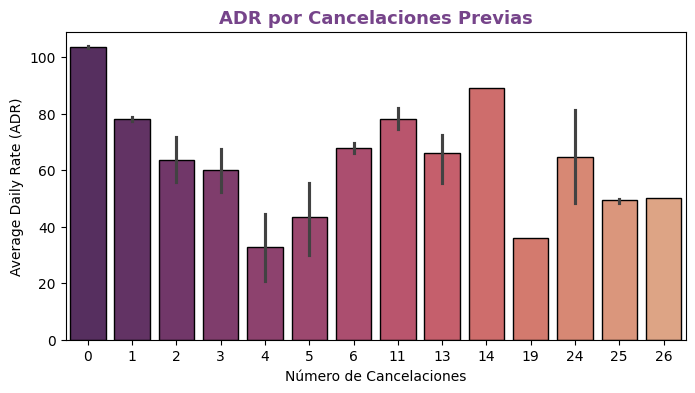

In [66]:
plt.figure(figsize=(8, 4))

ax = sns.barplot(data=df, x="previous_cancellations", y="adr", 
                 order=sorted(df["previous_cancellations"].unique()), 
                 edgecolor="k", palette="flare_r")

plt.title("ADR por Cancelaciones Previas", size=13, weight="bold", color="#76448A")
plt.xlabel("Número de Cancelaciones")
plt.ylabel("Average Daily Rate (ADR)")

plt.show()


C:\Users\USUARIO\AppData\Local\Temp\ipykernel_25244\2317560000.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df, x="children", y="adr",


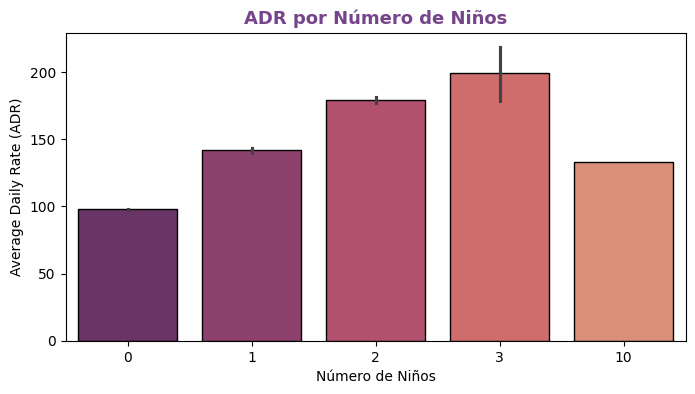

In [67]:
plt.figure(figsize=(8, 4))

ax = sns.barplot(data=df, x="children", y="adr", 
                 order=sorted(df["children"].unique()), edgecolor="k", palette="flare_r")

plt.title("ADR por Número de Niños", size=13, weight="bold", color="#76448A")
plt.xlabel("Número de Niños")
plt.ylabel("Average Daily Rate (ADR)")

plt.show()


C:\Users\USUARIO\AppData\Local\Temp\ipykernel_25244\826285916.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df, x="babies", y="adr",


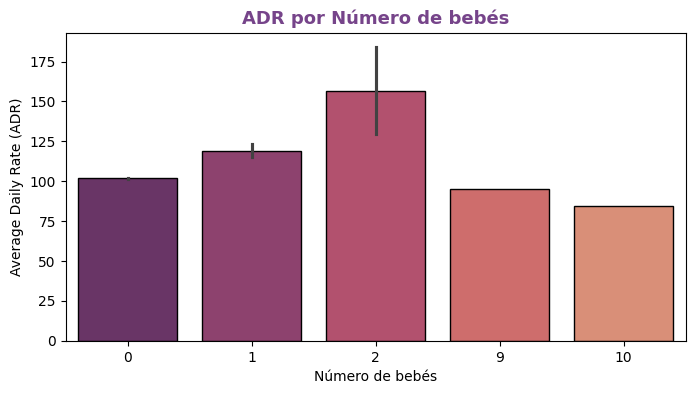

In [68]:
plt.figure(figsize=(8, 4))

ax = sns.barplot(data=df, x="babies", y="adr", 
                 order=sorted(df["babies"].unique()), edgecolor="k", palette="flare_r")

plt.title("ADR por Número de bebés", size=13, weight="bold", color="#76448A")
plt.xlabel("Número de bebés")
plt.ylabel("Average Daily Rate (ADR)")

plt.show()


### 1.3 Correlación de Variables Continuas

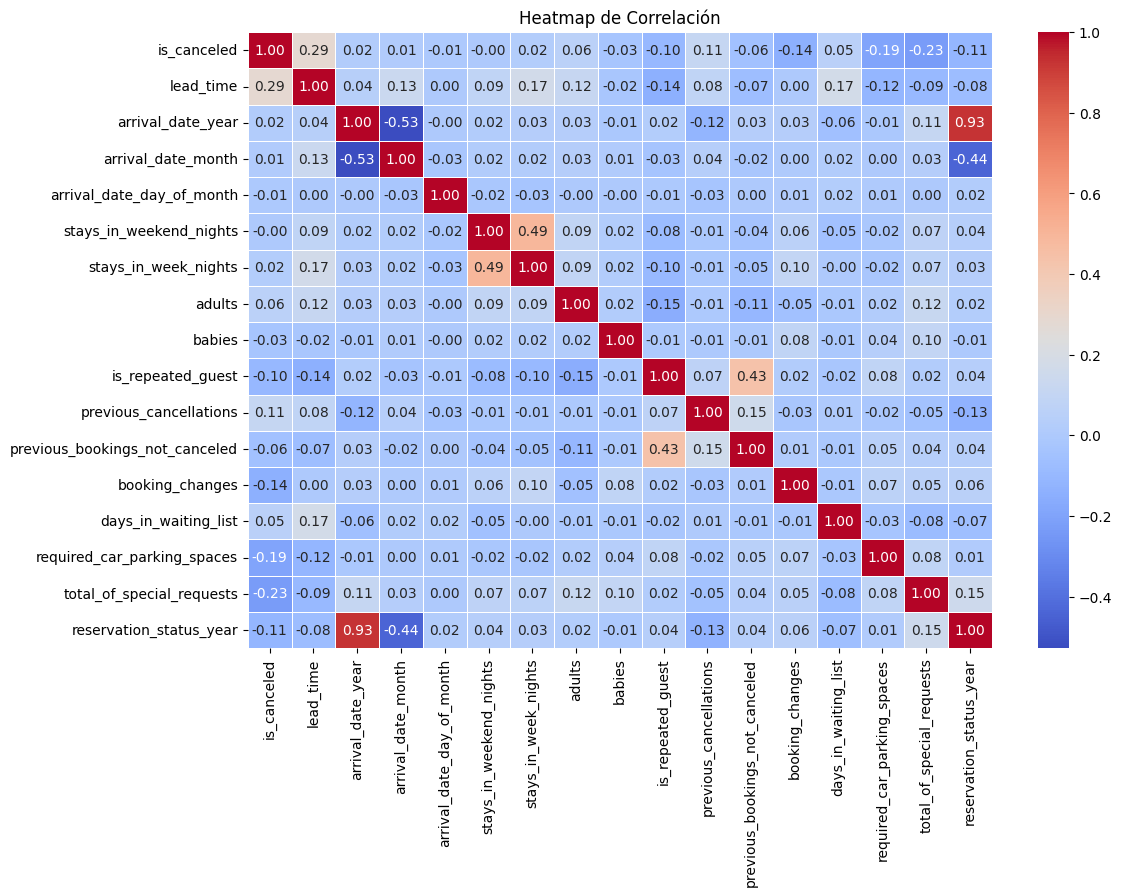

In [69]:

numerical_cols = X.select_dtypes(include=["int64", "float64"]).columns

# Calcular la matriz de correlación
corr_matrix = X[numerical_cols].corr()

# Graficar el heatmap de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap de Correlación")
plt.show()



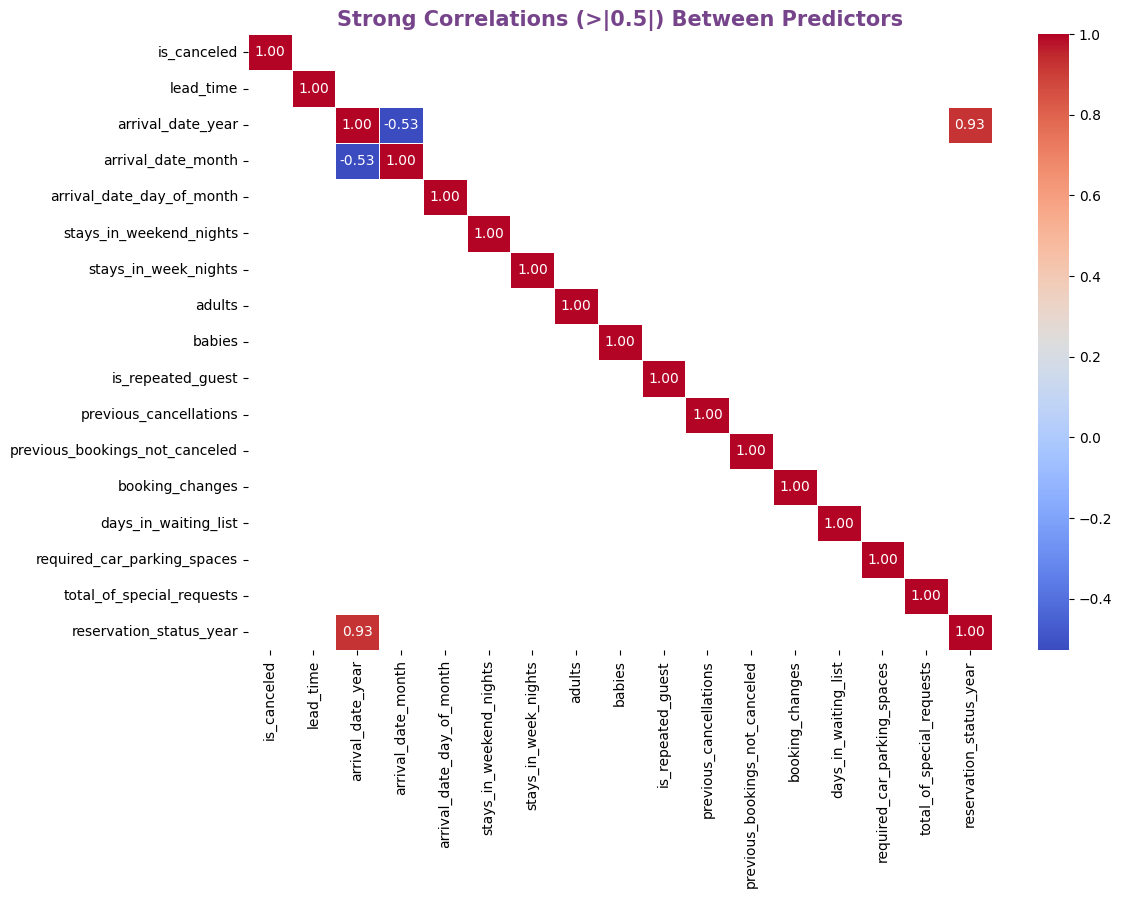

In [70]:
mask = (corr_matrix.abs() <= 0.5)

# Usamos la máscara para establecer esos valores como NaN
corr_matrix_filtered = corr_matrix.mask(mask)

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix_filtered, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, mask=corr_matrix_filtered.isnull())

plt.title("Strong Correlations (>|0.5|) Between Predictors", size=15, weight="bold", color="#76448A")
plt.show()



### 1.4 Importancia de Variables Continuas

## 2. PREPROCESAMIENTO

Para el anterior punto ya se ha realizado algo de preprocesamiento para poder analizar correctamente los datos por lo que puede haber tareas que se repitan sobre el dataset. En este caso se va a permitir, aunque ejecutado todo de manera secuencial sea ineficiente, para poder separar lo que es el preprocesamiento y el pipeline de datos y permitir su replicación.

### 2.1 Pipeline de Datos

Comenzaremos con el tratamiento de valores nulos. 

Eliminaremos las filas en las que ADR sea nulo ya que no nos sirven para predecir esta variable ya que no nos daría información relacionada.

Para el resto de valores nulos que encontremos los transformaremos en 0 ya que es lo que mejor puede comportarse. Por ejemplo, si el valor de children es nulo, lo más normal es que no haya niños y por tanto ese valor nulo se corresponda más adecuadamente con 0.

In [71]:
df = df.dropna(subset=["adr"])
df.fillna(0, inplace=True)

También eliminaremos las filas que no tienen huespedes si hubiese alguna ya que no nos interesan.

In [72]:
df = df[~((df["adults"] == 0) & (df["children"] == 0) & (df["babies"] == 0))]

A continuación haremos un tratamiento de los valores extremos de ADR que pueden afectar a las predicciones. Recortaremos los valores extremos usando el rango intercuartil.

In [73]:
import numpy as np

Q1 = np.percentile(df["adr"], 25)
Q3 = np.percentile(df["adr"], 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df["adr"] >= lower_bound) & (df["adr"] <= upper_bound)]

Ahora transformaremos las variables categóricas en valores que el modelo de ML pueda entender. Para ello aplicaremos la técnica de One-Hot Encoding.

In [74]:
categorical_vars = df.select_dtypes(include=['object', 'category']).columns.tolist()

df = pd.get_dummies(df, columns=categorical_vars, drop_first=True)

A continuación realizaremos un escalado de las variables para que estén todas en la misma escala y así evitar que valores muy grandes dominen a valores pequeños y aumentar la convergencia del modelo.

In [75]:
from sklearn.preprocessing import StandardScaler

numerical_cols = df.select_dtypes(include=["int64", "float64"]).columns
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])